In [ ]:
!pip install pdfplumber

In [ ]:
!pip install -U matplotlib

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
!pip install konlpy

Processing 417회_환경노동위원회.PDF
Top 10 most common words:
'2024': 96 times
'의안번호': 84 times
'일부개정법률안': 72 times
'의원': 68 times
'대표발의': 68 times
'7': 60 times
'8': 44 times
'관한': 33 times
'위원': 28 times
'회부됨': 28 times


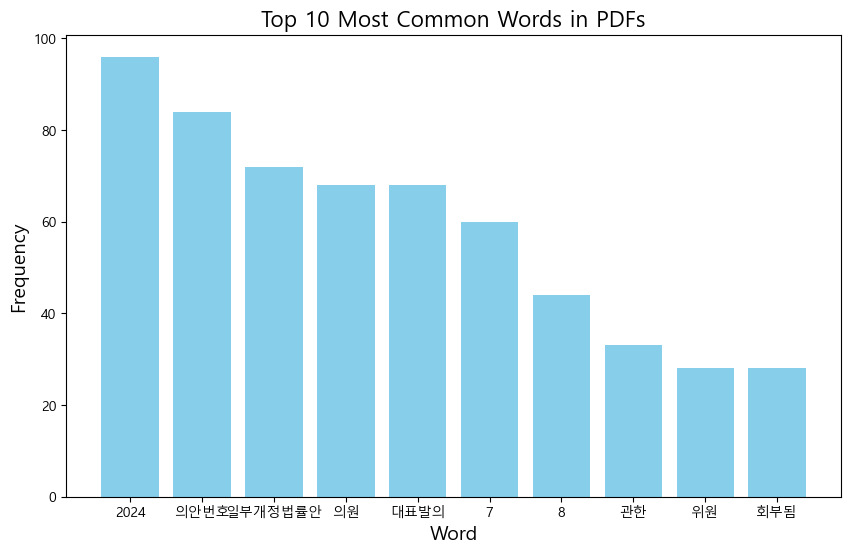

In [3]:
import os
import pdfplumber
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import font_manager, rc
import re

# 한글 폰트 설정 (예: Windows의 'Malgun Gothic' 또는 Ubuntu의 'NanumGothic')
def set_korean_font():
    # Windows의 경우 'Malgun Gothic', 우분투의 경우 'NanumGothic'을 사용
    font_path = ''
    if os.name == 'nt':  # Windows
        font_path = 'C:/Windows/Fonts/malgun.ttf'
    else:  # Ubuntu or other OS
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

# PDF에서 텍스트 추출하는 함수
def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        all_text = ''
        for page in pdf.pages:
            all_text += page.extract_text()
    return all_text

# 지정된 폴더에서 모든 PDF 파일 텍스트 추출
def extract_texts_from_folder(folder_path):
    all_text = ''
    for filename in os.listdir(folder_path):
        # 파일 확장자를 소문자로 변환하여 .pdf나 .PDF 모두 처리 가능
        if filename.lower().endswith('.pdf'):
            pdf_path = os.path.join(folder_path, filename)
            print(f"Processing {filename}")
            extracted_text = extract_text_from_pdf(pdf_path)
            all_text += extracted_text
    return all_text

# 텍스트 빈도 시각화 함수 (단어 기반)
def visualize_word_frequencies(text):
    # 정규식을 사용하여 텍스트에서 단어 추출 (한글, 영어, 숫자 포함)
    words = re.findall(r'\b[가-힣a-zA-Z0-9]+\b', text)

    # 단어 빈도 계산
    word_count = Counter(words)
    
    # 가장 많이 나온 단어 10개 추출
    most_common_words = word_count.most_common(10)

    # 가장 빈도 높은 10개 단어 출력
    print("Top 10 most common words:")
    for word, count in most_common_words:
        print(f"'{word}': {count} times")

    if not most_common_words:
        print("No text found for visualization.")
        return

    # 단어와 빈도 분리
    words, counts = zip(*most_common_words)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title('Top 10 Most Common Words in PDFs', fontsize=16)
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

# upload 폴더에 있는 모든 PDF 처리
folder_path = 'upload'  # PDF가 있는 폴더 경로

# 한글 폰트 설정
set_korean_font()

# 텍스트 추출 및 시각화
all_text = extract_texts_from_folder(folder_path)
visualize_word_frequencies(all_text)


Processing 417회_환경노동위원회.PDF


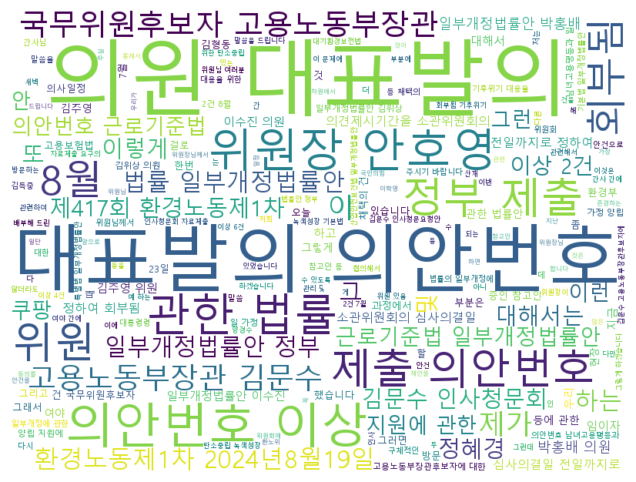

In [16]:
import os
import pdfplumber
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# PDF에서 텍스트 추출하는 함수
def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        all_text = ''
        for page in pdf.pages:
            all_text += page.extract_text()
    return all_text

# 지정된 폴더에서 모든 PDF 파일 텍스트 추출
def extract_texts_from_folder(folder_path):
    all_text = ''
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.pdf'):
            pdf_path = os.path.join(folder_path, filename)
            print(f"Processing {filename}")
            extracted_text = extract_text_from_pdf(pdf_path)
            all_text += extracted_text
    return all_text

# 워드 클라우드 시각화 함수
def visualize_wordcloud(text):
    # 정규식을 사용하여 텍스트에서 단어 추출 (한글, 영어, 숫자 포함)
    words = re.findall(r'\b[가-힣a-zA-Z0-9]+\b', text)
    word_string = ' '.join(words)

    # 워드 클라우드 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로 설정 (Windows 기준)
                          width=800, height=600, background_color='white').generate(word_string)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 제거
    plt.show()

# upload 폴더에 있는 모든 PDF 처리
folder_path = 'upload'  # PDF가 있는 폴더 경로

# 텍스트 추출 및 워드 클라우드 시각화
all_text = extract_texts_from_folder(folder_path)
visualize_wordcloud(all_text)


Processing 417회_환경노동위원회.PDF
Top 10 most common words:
'법률': 104 times
'을': 101 times
'의안': 86 times
'번호': 85 times
'일부': 83 times
'개정': 78 times
'의원': 72 times
'제': 70 times
'대표': 69 times
'발의': 68 times


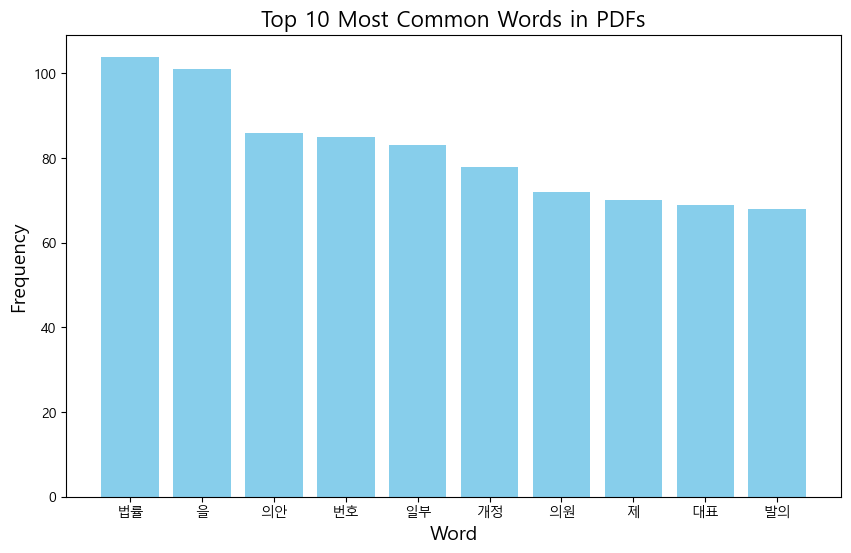

In [5]:
import os
import pdfplumber
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import font_manager, rc
import re
from konlpy.tag import Okt

# 한글 폰트 설정 (예: Windows의 'Malgun Gothic' 또는 Ubuntu의 'NanumGothic')
def set_korean_font():
    # Windows의 경우 'Malgun Gothic', 우분투의 경우 'NanumGothic'을 사용
    font_path = ''
    if os.name == 'nt':  # Windows
        font_path = 'C:/Windows/Fonts/malgun.ttf'
    else:  # Ubuntu or other OS
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

# PDF에서 텍스트 추출하는 함수
def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        all_text = ''
        for page in pdf.pages:
            all_text += page.extract_text()
    return all_text

# 지정된 폴더에서 모든 PDF 파일 텍스트 추출
def extract_texts_from_folder(folder_path):
    all_text = ''
    for filename in os.listdir(folder_path):
        # 파일 확장자를 소문자로 변환하여 .pdf나 .PDF 모두 처리 가능
        if filename.lower().endswith('.pdf'):
            pdf_path = os.path.join(folder_path, filename)
            print(f"Processing {filename}")
            extracted_text = extract_text_from_pdf(pdf_path)
            all_text += extracted_text
    return all_text

# 기본 불용어 리스트
def get_default_stopwords():
    return [
        '있다', '없다', '하다', '되다', '이다', '그', '저', '이', '거기', '저기', '것', '나', '너', '우리', '너희', '그들',
        '그리고', '하지만', '그러나', '그래서', '때문에', '즉', '만약', '그렇다면', '그리고', '그러므로', '그러나', '또한', 
        '또', '그래도', '때', '어디', '어느', '어떻게', '누구', '왜', '무엇', '의', '가', '이', '은', '를', '에', '로', 
        '에게', '와', '과', '도', '만', '뿐', '까지', '에서', '까지', '하고', '이며', '처럼', '같이', '보다', '보다도', 
        '오', '여', '또는', '아니면', '그리고', '즉', '앞', '뒤', '위', '아래', '안', '밖', '좌', '우', '옆', '안쪽', '밖쪽', 
        '및', '더', '덜', '가장', '그때', '지금', '때', '언제', '날', '연', '월', '일', '년', '시간', '분', '초', '저번', '다음',
        '이후', '전', '후', '시작', '끝', '동안', '사이', '과거', '현재', '미래'
    ]


# 사용자가 불용어 리스트를 입력할 수 있게 함
def get_stopwords_from_user():
    stopwords_input = input("추가할 불용어를 쉼표로 구분하여 입력하세요 (예: 있다, 없다, 하다, 되다): ")
    if stopwords_input:
        user_stopwords = [word.strip() for word in stopwords_input.split(',')]
    else:
        user_stopwords = []
    return user_stopwords

# Okt 객체 생성 및 불용어 제거 함수
okt = Okt()

def remove_stopwords(text, stopwords):
    tokens = okt.morphs(text)  # 형태소로 분리
    filtered_tokens = [word for word in tokens if word not in stopwords]  # 불용어 제거
    return ' '.join(filtered_tokens)

# 텍스트 빈도 시각화 함수 (단어 기반)
def visualize_word_frequencies(text):
    # 정규식을 사용하여 텍스트에서 단어 추출 (한글, 영어, 숫자 포함)
    words = re.findall(r'\b[가-힣a-zA-Z0-9]+\b', text)

    # 단어 빈도 계산
    word_count = Counter(words)
    
    # 가장 많이 나온 단어 10개 추출
    most_common_words = word_count.most_common(10)

    # 가장 빈도 높은 10개 단어 출력
    print("Top 10 most common words:")
    for word, count in most_common_words:
        print(f"'{word}': {count} times")

    if not most_common_words:
        print("No text found for visualization.")
        return

    # 단어와 빈도 분리
    words, counts = zip(*most_common_words)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title('Top 10 Most Common Words in PDFs', fontsize=16)
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

# upload 폴더에 있는 모든 PDF 처리
folder_path = 'upload'  # PDF가 있는 폴더 경로

# 한글 폰트 설정
set_korean_font()

# 기본 불용어 리스트
default_stopwords = get_default_stopwords()

# 사용자가 입력한 불용어 리스트
user_stopwords = get_stopwords_from_user()

# 기본 불용어 리스트에 사용자 입력 불용어 추가
combined_stopwords = default_stopwords + user_stopwords

# 텍스트 추출 및 불용어 제거 후 시각화
all_text = extract_texts_from_folder(folder_path)
cleaned_text = remove_stopwords(all_text, combined_stopwords)
visualize_word_frequencies(cleaned_text)
